In [53]:
# Importações comuns
import numpy as np
import os
#Para garantir estabilidade e ser mais fácil reproduzir experimento
seed = 1508
np.random.seed(seed)
# Para plotar figuras
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Ignorar warnings desnecessários (ver SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

seed = 1508
np.random.seed(seed)

In [54]:
# import os
# import tarfile
# from six.moves import urllib

# DOWNLOAD_ROOT = "http://lib.stat.cmu.edu/datasets/boston/"
# HOUSING_PATH = os.path.join("datasets", "housing")
# HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     os.makedirs(housing_path, exist_ok=True) #Cria diretorio
#     tgz_path = os.path.join(housing_path, "housing.tgz") #caminho do arquivo
#     urllib.request.urlretrieve(housing_url, tgz_path) #request data
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close() #Importante!!!

# fetch_housing_data() #Cria diretório datasets/housing no espaço de trabalho

# import pandas as pd

# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path) #Função do pandas para carregar arquivo CSV
from sklearn.datasets import load_boston
# housing = load_boston

import pandas as pd
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

df.head()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [56]:
df.sample(n=20, random_state=seed)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
194,0.01439,60.0,2.93,0.0,0.4010,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38,29.1
18,0.80271,0.0,8.14,0.0,0.5380,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,20.2
82,0.03659,25.0,4.86,0.0,0.4260,6.302,32.2,5.4007,4.0,281.0,19.0,396.90,6.72,24.8
357,3.84970,0.0,18.10,1.0,0.7700,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
324,0.34109,0.0,7.38,0.0,0.4930,6.415,40.1,4.7211,5.0,287.0,19.6,396.90,6.12,25.0
354,0.04301,80.0,1.91,0.0,0.4130,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
487,4.83567,0.0,18.10,0.0,0.5830,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6
80,0.04113,25.0,4.86,0.0,0.4260,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29,28.0
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
382,9.18702,0.0,18.10,0.0,0.7000,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3


In [57]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


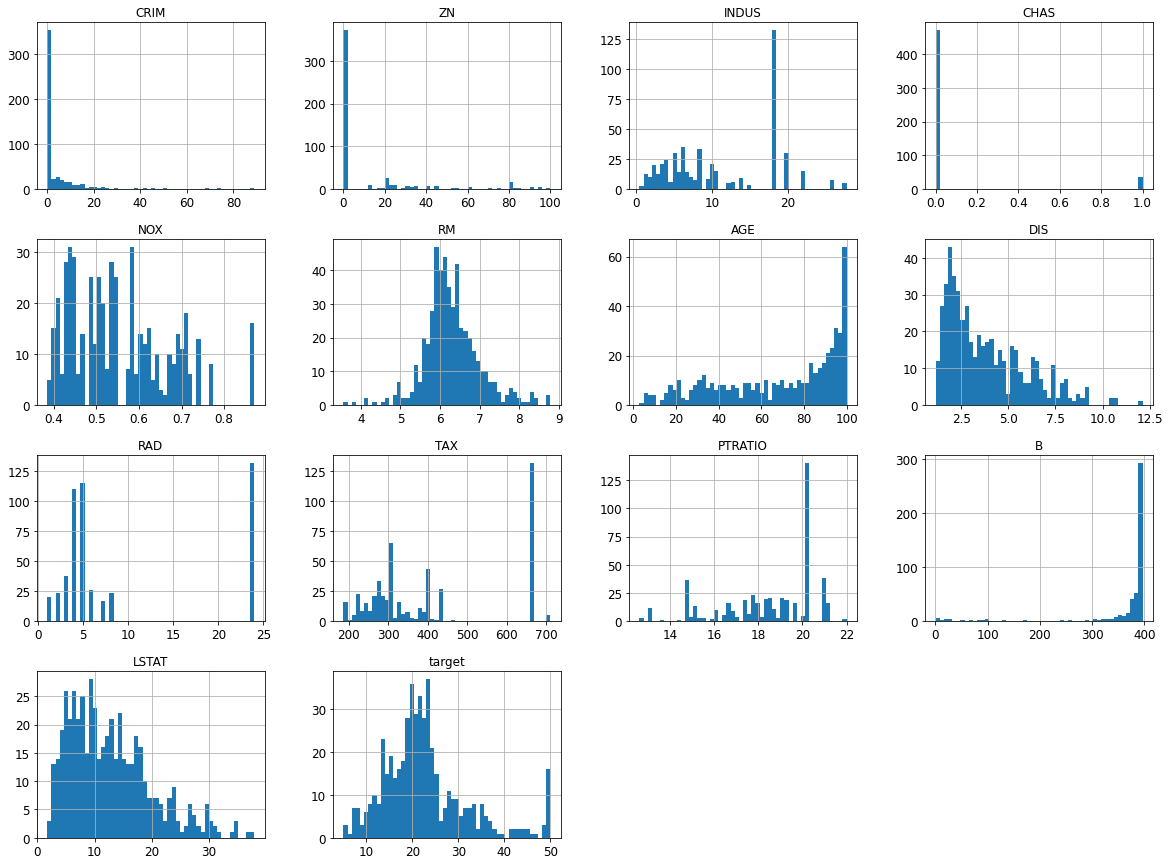

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, 
                                       test_size=0.2, #20% para teste
                                       random_state=seed)

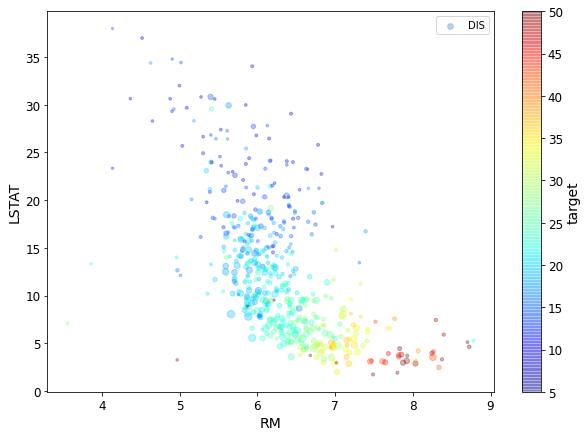

In [60]:
df.plot(kind="scatter", x="RM", y="LSTAT", alpha=0.3,
        s=df["DIS"]*5, label="DIS", 
        figsize=(10,7),
        c="target", cmap=plt.get_cmap("jet"), colorbar=True,
        sharex=False)
plt.legend()
#claramente casa com alto RM, baixo LSTAT e talvez alto DIS tendem a aumentar o valor das casas

In [61]:
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [62]:
corr_matrix["target"].sort_values(ascending=False)
#a matriz de correlação parece confirmar os apontamentos anteriories

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccdbba7a90>,
      dtype=object)

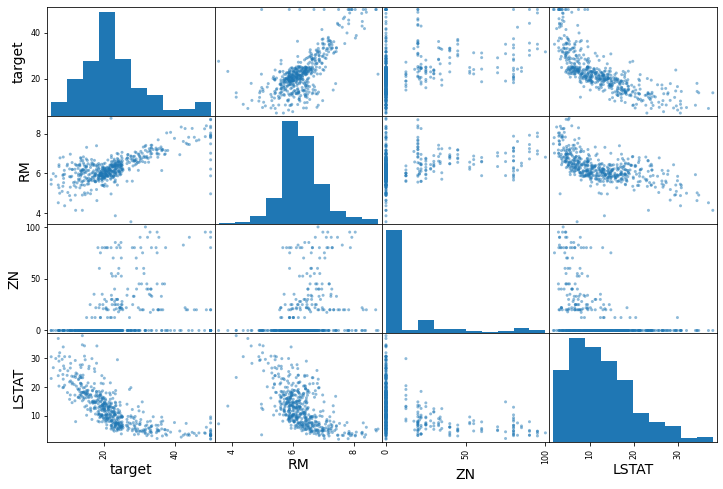

In [63]:
from pandas.plotting import scatter_matrix

attributes = ["target", "RM", "ZN",
              "LSTAT"]
scatter_matrix(df[attributes], figsize=(12, 8))

(0.0, 10.0, 0.0, 60.0)

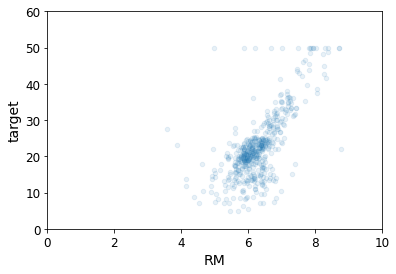

In [64]:
df.plot(kind="scatter", x="RM", y="target",
             alpha=0.1)
plt.axis([0, 10, 0, 60])

In [65]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, 
                                       test_size=0.2, #20% para teste
                                       random_state=seed)

In [66]:
df["target"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

In [67]:
from sklearn.model_selection import ShuffleSplit

# # #split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(df):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
df = strat_train_set.drop("target", axis=1) # O método drop cria cópia sem a coluna em questao
df_labels = strat_train_set["target"].copy() #salvando uma cópia

In [68]:
# df = df.drop("target", axis=1) # O método drop cria cópia sem a coluna em questao
# df_labels = df["target"].copy() #salvando uma cópia

df_labels

419     8.4
364    21.9
137    17.1
212    22.4
181    36.2
       ... 
342    16.5
274    32.4
223    30.1
78     21.2
437     8.7
Name: target, Length: 404, dtype: float64

In [69]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head() 
sample_incomplete_rows
# df.isnull().any(axis=1)

#Não há dados faltantes do dataframe, uma vez que sample_incomplete_rows está vazio

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [70]:
#Não há dados com valores de string ou categoricas.

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  #StandardScaler serve para fazer a reescalar das variáveis

num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

df_tr = num_pipeline.fit_transform(df)

try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [72]:
df_tr

array([[ 0.99402523, -0.49611303,  1.07908433, ...,  0.85581158,
        -3.31821008,  1.42853167],
       [ 0.00862012, -0.49611303,  1.07908433, ...,  0.85581158,
        -0.01982084, -1.00875946],
       [-0.36033863, -0.49611303,  1.63370956, ...,  1.31872212,
         0.4061358 ,  0.29019799],
       ...,
       [-0.32933118, -0.49611303, -0.66235111, ..., -0.44033792,
         0.43652279, -0.68611519],
       [-0.39530518, -0.49611303,  0.30787721, ...,  0.16144578,
         0.32337974, -0.02406591],
       [ 1.39169634, -0.49611303,  1.07908433, ...,  0.85581158,
        -3.7398565 ,  1.94671792]])

In [73]:
num_attribs = list(df)
#cat_attribs = ["ocean_proximity"]

#Este é o pipeline completo!
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #um pipeline dentro do outro
        #("cat", OneHotEncoder(), cat_attribs),
    ]) 

""" Lembrando: num_pipeline é o pipeline que transforma variavéis numéricas

num_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy="median")),
      ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
      ('std_scaler', StandardScaler()),
    ])
"""

df_prepared = full_pipeline.fit_transform(df)

In [74]:
df_prepared

array([[ 0.99402523, -0.49611303,  1.07908433, ...,  0.85581158,
        -3.31821008,  1.42853167],
       [ 0.00862012, -0.49611303,  1.07908433, ...,  0.85581158,
        -0.01982084, -1.00875946],
       [-0.36033863, -0.49611303,  1.63370956, ...,  1.31872212,
         0.4061358 ,  0.29019799],
       ...,
       [-0.32933118, -0.49611303, -0.66235111, ..., -0.44033792,
         0.43652279, -0.68611519],
       [-0.39530518, -0.49611303,  0.30787721, ...,  0.16144578,
         0.32337974, -0.02406591],
       [ 1.39169634, -0.49611303,  1.07908433, ...,  0.85581158,
        -3.7398565 ,  1.94671792]])

In [75]:
df_prepared.shape

(404, 13)

In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) #Full pipeline

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [14.81354187 37.82477323 19.51577185 22.03031317 27.95690863]


In [78]:
print("Labels:", list(some_labels))

Labels: [8.4, 21.9, 17.1, 22.4, 36.2]


In [79]:
some_data_prepared

array([[ 0.99402523, -0.49611303,  1.07908433, -0.27288841,  1.48895437,
         0.74369981,  0.31853268, -0.97534806,  1.74167142,  1.59755291,
         0.85581158, -3.31821008,  1.42853167],
       [ 0.00862012, -0.49611303,  1.07908433,  3.66450153,  1.48895437,
         3.46981028,  0.54655619, -0.92428019,  1.74167142,  1.59755291,
         0.85581158, -0.01982084, -1.00875946],
       [-0.36033863, -0.49611303,  1.63370956, -0.27288841,  0.66206475,
         0.22802452,  1.09880062, -0.94960653, -0.61398728,  0.22203681,
         1.31872212,  0.4061358 ,  0.29019799],
       [-0.37630977, -0.49611303, -0.0199224 ,  3.66450153, -0.52548948,
        -0.67371038, -0.49023819, -0.11794305, -0.61398728, -0.73902247,
         0.11515472,  0.37230064,  0.49132689],
       [-0.39383736, -0.49611303, -1.20965939, -0.27288841, -0.53428618,
        -0.20402775, -0.19095734, -0.60449479, -0.73177022, -1.2435786 ,
        -0.2551737 ,  0.43652279, -0.42772043]])

In [80]:
from sklearn.metrics import mean_squared_error as MSE

df_predictions = lin_reg.predict(df_prepared)
lin_mse = MSE(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse) #Não é necessariamente obrigatório
lin_rmse

4.700198090122554

In [81]:
from sklearn.metrics import mean_absolute_error as MAE

lin_mae = MAE(df_labels, df_predictions)
lin_mae

3.2878087310796724

In [82]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= seed)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1508, splitter='best')

In [83]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = MSE(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#Avaliação de modelo

In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10) 

#cv = 10 é número de pedaços

tree_rmse_scores = np.sqrt(-scores)

In [85]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.49978319 6.34882359 4.54489797 4.93528856 4.25778698 4.5678496
 5.78623366 4.8321579  4.58609311 4.13612137]
Mean: 4.849503594608688
Standard deviation: 0.659994647446409


In [87]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.08172483 5.26940227 5.17518278 4.16239552 5.04235635 4.51152045
 7.47825479 4.68591449 3.69618271 4.13549246]
Mean: 4.923842664389811
Standard deviation: 0.9839534066991946


In [89]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(df_prepared, df_labels) #Treinar modelo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [92]:
df_predictions = forest_reg.predict(df_prepared) #Predizer
forest_mse = MSE(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.4677684786541414

In [94]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4.89476998 3.62104317 2.44186704 3.01502619 3.11262349 2.7860411
 5.14359942 2.28589206 3.30644068 3.33438113]
Mean: 3.3941684262249296
Standard deviation: 0.900169224891727


# Ajustando e selecionando modelo

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Vamos tentar 12 = 3x4 combinação de parâmetros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Tentar 6 = 2×3 combinações do bootstrap no modo 'Falso'
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=seed)

# Vamos treinar com 5-folds, então temos (12+6)*5=90 rodadas de treinamento!!!

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1508,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [97]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [98]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=1508, verbose=0, warm_start=False)

In [99]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.265224303716788 {'max_features': 2, 'n_estimators': 3}
4.214237548382569 {'max_features': 2, 'n_estimators': 10}
3.6928196174499672 {'max_features': 2, 'n_estimators': 30}
4.275877267419595 {'max_features': 4, 'n_estimators': 3}
3.67571237951415 {'max_features': 4, 'n_estimators': 10}
3.465935958573101 {'max_features': 4, 'n_estimators': 30}
4.107368345504403 {'max_features': 6, 'n_estimators': 3}
3.685158009159056 {'max_features': 6, 'n_estimators': 10}
3.59493104201527 {'max_features': 6, 'n_estimators': 30}
4.405824163187552 {'max_features': 8, 'n_estimators': 3}
4.00070389254222 {'max_features': 8, 'n_estimators': 10}
3.5478766762883533 {'max_features': 8, 'n_estimators': 30}
4.0775063362073025 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.5180096250894795 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.9133231372684243 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.4665836354906903 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [101]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007633,0.003154,0.001006,0.000050,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-22.149753,-24.127010,-29.288560,-43.759890,-19.287722,-27.722587,8.657701,18,-5.436226e+00,-7.907083e+00,-6.089257e+00,-7.877441e+00,-7.983800e+00,-7.058761e+00,1.078716e+00
1,0.016999,0.000466,0.001545,0.000062,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-17.887043,-19.257581,-13.647590,-25.135940,-12.870836,-17.759798,4.415410,15,-4.098627e+00,-4.022347e+00,-3.322329e+00,-3.813672e+00,-3.365642e+00,-3.724523e+00,3.247017e-01
2,0.048885,0.000814,0.003015,0.000143,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-13.614793,-13.416023,-12.446513,-17.824161,-10.883094,-13.636917,2.305771,9,-2.336669e+00,-2.209960e+00,-2.302914e+00,-2.502534e+00,-2.472293e+00,-2.364874e+00,1.087400e-01
3,0.006529,0.000078,0.000964,0.000039,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-19.195185,-13.458587,-14.677462,-33.634870,-10.449528,-18.283126,8.174963,16,-3.712886e+00,-6.035590e+00,-6.253079e+00,-5.043093e+00,-7.490971e+00,-5.707124e+00,1.265384e+00
4,0.021030,0.001492,0.001641,0.000122,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-16.584767,-11.649579,-11.028036,-17.666420,-10.625506,-13.510861,2.989034,7,-4.008138e+00,-2.535057e+00,-3.078667e+00,-2.163638e+00,-3.323560e+00,-3.021812e+00,6.388297e-01
5,0.055049,0.001587,0.003047,0.000214,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-16.009628,-11.542114,-9.446569,-12.974673,-10.090577,-12.012712,2.341020,2,-1.858114e+00,-1.907145e+00,-1.884753e+00,-1.684537e+00,-2.078749e+00,-1.882660e+00,1.256263e-01
6,0.007478,0.000114,0.001064,0.000022,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-23.204019,-14.248669,-14.914705,-19.903827,-12.081153,-16.870475,4.073120,14,-3.957396e+00,-4.447798e+00,-4.027165e+00,-4.651772e+00,-4.613789e+00,-4.339584e+00,2.925861e-01
7,0.022341,0.000298,0.001617,0.000017,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-17.613117,-11.168685,-11.031270,-15.717806,-12.371069,-13.580390,2.630902,8,-2.809890e+00,-2.671064e+00,-2.802560e+00,-2.378031e+00,-2.661543e+00,-2.664618e+00,1.564066e-01
8,0.062457,0.002362,0.003028,0.000162,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-17.141159,-12.871838,-9.540388,-15.654702,-9.409558,-12.923529,3.131901,6,-1.810919e+00,-1.842323e+00,-1.854529e+00,-1.998265e+00,-1.995778e+00,-1.900363e+00,8.019757e-02
9,0.007994,0.000103,0.001003,0.000010,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-22.173772,-14.002332,-21.766173,-25.488656,-13.625500,-19.411287,4.750649,17,-5.181390e+00,-4.554221e+00,-6.563481e+00,-4.626429e+00,-5.529379e+00,-5.290980e+00,7.311013e-01


In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=seed)

rnd_search = RandomizedSearchCV(forest_reg,
                                param_distributions=param_distribs,
                                n_iter=10,
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=seed)

rnd_search.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [104]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.4625839506004263 {'max_features': 6, 'n_estimators': 79}
3.5782462318849864 {'max_features': 3, 'n_estimators': 87}
3.2472843090404386 {'max_features': 7, 'n_estimators': 158}
3.6498603696012433 {'max_features': 2, 'n_estimators': 75}
3.5243950564552096 {'max_features': 3, 'n_estimators': 119}
3.5902928617749246 {'max_features': 5, 'n_estimators': 17}
3.675906126753638 {'max_features': 2, 'n_estimators': 66}
3.4920431949414588 {'max_features': 4, 'n_estimators': 52}
3.421602869695546 {'max_features': 5, 'n_estimators': 70}
4.8613733699096455 {'max_features': 2, 'n_estimators': 4}


In [109]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.04944093, 0.00267036, 0.14114046, 0.00174075, 0.05138237,
       0.29042485, 0.01533757, 0.06171236, 0.00461915, 0.02939017,
       0.08872175, 0.01718493, 0.24623435])

In [110]:
#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = full_pipeline.named_transformers_["cat"] #Importância de ter salvo
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs #+ extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2904248492170173, 'RM'),
 (0.24623434969374958, 'LSTAT'),
 (0.14114045863730915, 'INDUS'),
 (0.08872174632514347, 'PTRATIO'),
 (0.06171236267222842, 'DIS'),
 (0.05138237275728463, 'NOX'),
 (0.049440932828879916, 'CRIM'),
 (0.0293901656670068, 'TAX'),
 (0.01718492857815592, 'B'),
 (0.015337572610377085, 'AGE'),
 (0.004619151230757546, 'RAD'),
 (0.002670362885505649, 'ZN'),
 (0.0017407468965845861, 'CHAS')]

#Modelo e teste final

In [112]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("target", axis=1)
y_test = strat_test_set["target"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [113]:
final_rmse

2.726337951804761